In [1]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import chart_studio

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

Error importing optional module scipy.stats
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/_plotly_utils/optional_imports.py", line 28, in get_module
    return import_module(name)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/lib/python3/dist-packages/scipy/stats/__init__.py", line 345, in <module>
    from .stats import *
  File "/usr/lib/python3/dist-packages/scipy/stats/stats.py", line 169, in <module>
    import sci

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
demo = urllib.request.urlopen('https://www.mygov.in/corona-data/covid19-statewise-status')
soup = BeautifulSoup(demo, 'lxml')

In [4]:
tabledata = soup.find('div', class_='content clearfix')
time = tabledata.find('div', class_='field-item')
print('The Covid-19 data updated on',time.text)

The Covid-19 data updated on 10 April 2020, 17:00 GMT+5:30


In [5]:
State_Name = ['demo']
Total_confirmed = ['demo']
Cured = ['demo']
Death = ['demo']

In [6]:
for con in tabledata.find_all('div', class_='content'):
    
    item1 = con.find('div', class_='field field-name-field-select-state field-type-list-text field-label-above')
    data_state = item1.find('div', class_='field-items')
    State_Name.append(data_state.text)


    item2 = con.find('div', 
                     class_='field field-name-field-total-confirmed-indians field-type-number-integer field-label-above')
    data_cases = item2.find('div', class_='field-items')
    Total_confirmed.append(data_cases.text)


    item3 = con.find('div', 
                     class_='field field-name-field-cured field-type-number-integer field-label-above')
    data_cured = item3.find('div', class_='field-items')
    Cured.append(data_cured.text)


    item4 = con.find('div', 
                     class_='field field-name-field-deaths field-type-number-integer field-label-above')
    data_death = item4.find('div', class_='field-items')
    Death.append(data_death.text)

In [7]:
Data_table = {'STATE NAME':State_Name, 'TOTAL CONFIRMED':Total_confirmed, 'CURED/DISCHARGED/MIGRATED':Cured,
             'DEATH':Death}

In [8]:
covid_india = pd.DataFrame(Data_table)

In [9]:
covid_india = covid_india.drop(0)
covid_india = covid_india.reset_index(drop=True)

In [10]:
covid_india.dtypes

STATE NAME                   object
TOTAL CONFIRMED              object
CURED/DISCHARGED/MIGRATED    object
DEATH                        object
dtype: object

In [11]:
covid_india['TOTAL CONFIRMED'] = covid_india['TOTAL CONFIRMED'].astype(int)
covid_india['CURED/DISCHARGED/MIGRATED'] = covid_india['CURED/DISCHARGED/MIGRATED'].astype(int)
covid_india['DEATH'] = covid_india['DEATH'].astype(int)

In [14]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH
0,AndhraPradesh,348,6,4
1,AndamanNicobar,11,0,0
2,Bihar,39,0,1
3,Chandigarh,18,7,0
4,Chhattisgarh,10,9,0


In [16]:
covid_india['ACTIVE CASES'] = covid_india['TOTAL CONFIRMED'] - covid_india['CURED/DISCHARGED/MIGRATED'] - covid_india['DEATH']

In [17]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,348,6,4,338
1,AndamanNicobar,11,0,0,11
2,Bihar,39,0,1,38
3,Chandigarh,18,7,0,11
4,Chhattisgarh,10,9,0,1


In [20]:
covid_india.style.background_gradient(cmap = 'Reds')

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,348,6,4,338
1,AndamanNicobar,11,0,0,11
2,Bihar,39,0,1,38
3,Chandigarh,18,7,0,11
4,Chhattisgarh,10,9,0,1
5,Delhi,720,25,12,683
6,Goa,7,0,0,7
7,Gujarat,241,26,17,198
8,Haryana,169,29,3,137
9,HimachalPradesh,18,2,1,15


In [21]:
total_active = covid_india.groupby('STATE NAME')['TOTAL CONFIRMED'].sum().sort_values(ascending = False).to_frame()

total_active.head()

,TOTAL CONFIRMED
STATE NAME,
Maharashtra,1364
TamilNadu,834
Delhi,720
Rajasthan,463
Telengana,442


In [22]:
total_active.style.background_gradient(cmap = 'Reds')

,TOTAL CONFIRMED
STATE NAME,
Maharashtra,1364
TamilNadu,834
Delhi,720
Rajasthan,463
Telengana,442
UttarPradesh,410
Kerala,357
AndhraPradesh,348
MP,259


In [23]:
covid_india.iplot(kind='bar',x='STATE NAME',y='TOTAL CONFIRMED',
                  title='State wise Covid-19 Cases',xTitle='State',yTitle='Total Cases')

In [24]:
fig=px.bar(covid_india,x="STATE NAME",y="TOTAL CONFIRMED",color='TOTAL CONFIRMED',title='Total cases in India')
fig.show()

In [25]:
fig=px.bar(covid_india,x="STATE NAME",y="DEATH",color='DEATH',title='Total Death in India')
fig.show()

In [26]:
fig=px.bar(covid_india,x="STATE NAME",y="CURED/DISCHARGED/MIGRATED",color='CURED/DISCHARGED/MIGRATED',
           title='Total Cases Close in India')
fig.show()

In [27]:
covid_india.head()

,STATE NAME,TOTAL CONFIRMED,CURED/DISCHARGED/MIGRATED,DEATH,ACTIVE CASES
0,AndhraPradesh,348,6,4,338
1,AndamanNicobar,11,0,0,11
2,Bihar,39,0,1,38
3,Chandigarh,18,7,0,11
4,Chhattisgarh,10,9,0,1


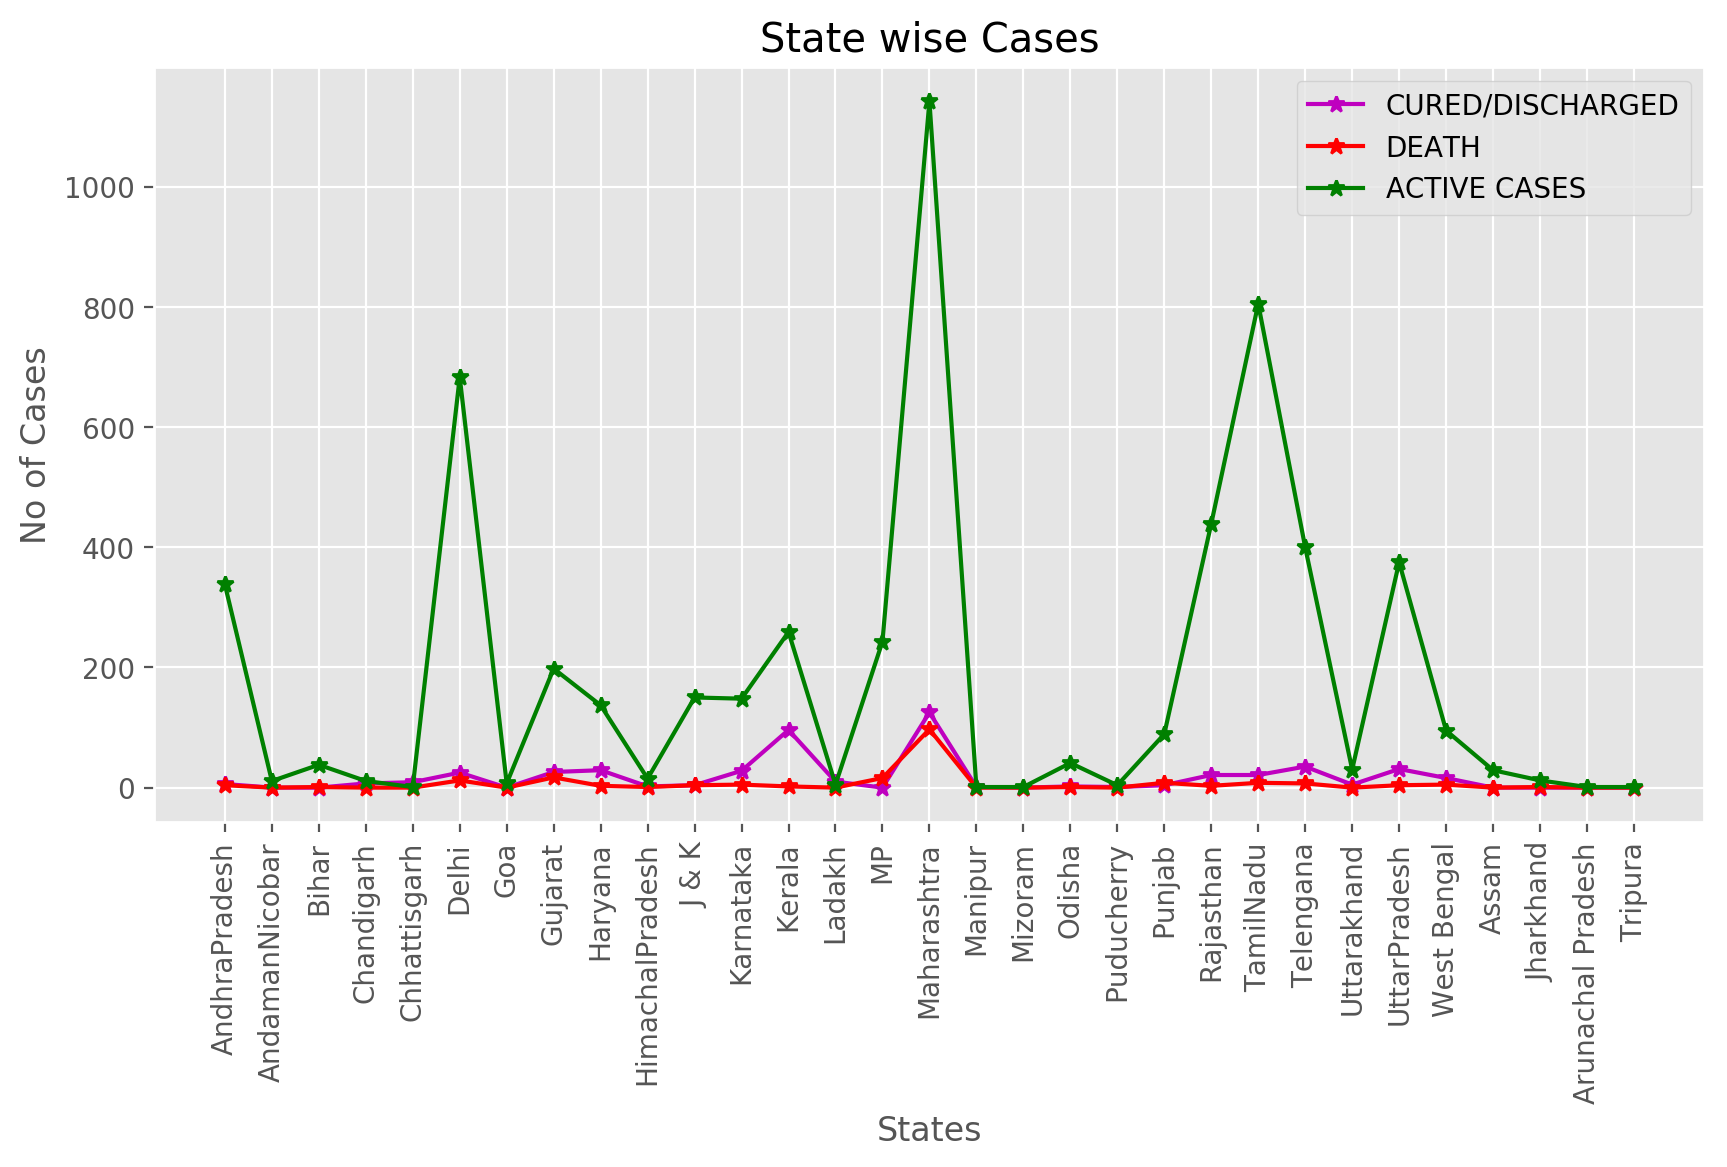

In [28]:
plt.figure(figsize=(10,5),dpi=200)

#plt.plot(covid_india['STATE NAME'], covid_india['TOTAL CONFIRMED'], label='Math marks', color='r')
plt.plot(covid_india['STATE NAME'], covid_india['CURED/DISCHARGED/MIGRATED'], label='CURED/DISCHARGED',marker='*', color='m')
plt.plot(covid_india['STATE NAME'], covid_india['DEATH'],marker='*', label='DEATH', color='r')
plt.plot(covid_india['STATE NAME'], covid_india['ACTIVE CASES'],marker='*', label='ACTIVE CASES', color='g')

plt.xticks(covid_india['STATE NAME'], rotation=90)
plt.xlabel('States')
plt.ylabel('No of Cases')
plt.title('State wise Cases')

plt.legend()
plt.show()

